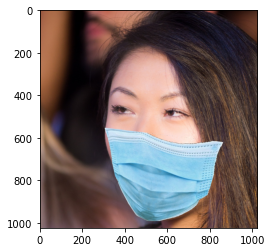

In [2]:
import tensorflow as tf
import cv2
import os

import matplotlib.pyplot as plt 
import numpy as np
# import as ← remove this line

img_rgb = cv2.imread("/home/rgukt-basar/Videos/pro/Mask/69000_Mask.jpg")
# Convert from BGR to RGB for proper color display
img_rg = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
plt.imshow(img_rg)
plt.show()


In [3]:
img_rgb.shape

(1024, 1024, 3)

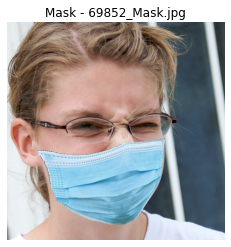

In [4]:
Datadirectory = "/home/rgukt-basar/Videos/pro/"
Classes = ["Mask", "NOMASK"]

for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_rgb = cv2.imread(os.path.join(path, img))  # ✅ Fixed here
        if img_rgb is None:
            print(f"❌ Failed to load image: {os.path.join(path, img)}")
            continue
        plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"{category} - {img}")
        plt.show()
        break
    break


In [5]:
training_Data = []  # data
img_size = 224      # set your desired image size

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)  # 0 or 1
        
        for img in os.listdir(path):
            try:
                img_rgb = cv2.imread(os.path.join(path, img))
                if img_rgb is None:
                    continue  # skip unreadable images
                new_array = cv2.resize(img_rgb, (img_size, img_size))
                training_Data.append((new_array, class_num))
            except Exception as e:
                print(f"Error loading {img}: {e}")
                pass

# Run the function to populate training_Data
create_training_Data()

# Check result
print(f"Total samples: {len(training_Data)}")


Total samples: 1948


In [6]:
create_training_Data() #calling function

In [16]:
print(len(training_Data))

3896


In [17]:
import random

random.shuffle(training_Data)

In [18]:
X = []
y = [] ## Label

for features, label in training_Data:

    X.append(features)
 
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)


In [19]:
X.shape

(3896, 224, 224, 3)

In [ ]:
# normalize the data

X= X/255.0; ## we are normalizing it

In [ ]:
print(np.array(X).shape)
print(len(y))


In [ ]:
 Y= np.array(y) 


In [ ]:
import pickle  #pickle to save a data in a good way   

pickle_out = open("X.pickle", "wb")

pickle.dump(X, pickle_out)

pickle_out.close()

pickle_out = open("y.pickle", "wb")

pickle.dump(y, pickle_out)

pickle_out.close()

In [ ]:
pickle_in= open("X.pickle", "rb")

X =pickle.load(pickle_in)

pickle_in= open("y.pickle", "rb")

y = pickle.load(pickle_in)

# deep learning for model

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" 
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()  # here mobilenet is predefine usin the tab 


In [ ]:
model.summary()

 # transfer learning  -tuning.weights will start from last check point

In [ ]:
 base_input =model.layers[0].input

In [ ]:
 base_output =model.layers[-4].output

In [ ]:
flat_layer =layers.Flatten()(base_output)
final_output =layers.Dense(1)(flat_layer)
final_output=layers.Activation('sigmoid')(final_output)

In [ ]:
# Get input and output from base model

base_input = base_model.input
base_output = base_model.output


In [ ]:
# Add custom layers
flat_layer = layers.Flatten()(base_output)
dense_layer = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(dense_layer)

In [ ]:
# Create new model
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [ ]:
new_model.summary()


# SETTING FOR BINARY CLASSFICATION (FACE MASK/NO FACE MASK)

In [ ]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
# Fit the model and capture the history
new_model.fit(X, y, epochs=50, validation_split=0.1)
# Print the history


In [ ]:
#for layer in model.layer :
   # layer.trainable = false

In [ ]:
from tensorflow import keras

model = keras.Sequential([
      keras.layers.Dense(64, activation='relu', input_shape=(32,)),
      keras.layers.Dense(10, activation='softmax')
  ])
model.save('my_model', save_format='tf')
    

# checking network prediction

In [ ]:
import cv2
import matplotlib.pyplot as plt 

#frame = cv2.imread("home/rgukt-basar/Videos/pro/Mask/69001_Mask.jpg")
frame = cv2.imread("/home/rgukt-basar/Videos/pro/Mask/69001_Mask.jpg")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))



In [ ]:
import numpy as np

final_image =cv2.resize(frame, (224,224))

final_image = np.expand_dims(final_image, axis=0)

## need fourth dimension

final_image=final_image/255.0

In [ ]:
frame.shape

In [ ]:
Predictions =new_model.predict(final_image)


In [ ]:
Predictions

In [ ]:
frame = cv2.imread('/home/rgukt-basar/Videos/pro/Mask/sad.jpeg')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

In [ ]:
faces = faceCascade.detectMultiScale (gray, 1.1,4)

for x,y,w,h in faces:

    roi_gray= gray[y:y+h, x:x+w]

    roi_color = frame [y:y+h, x:x+w]

    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    facess=  faceCascade.detectMultiScale(roi_gray)

    if len(facess) == 0:

        print("Face not detected")
   
    else:

        for (ex, ey, ew, eh) in facess:

            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load image
image_path = "/home/rgukt-basar/Videos/pro/Mask/sad.jpeg"
frame = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Load face cascade
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangles around faces
for x, y, w, h in faces:
    cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Show the image with rectangles using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Detected Face(s)")
plt.show()


In [ ]:
import cv2  # pip install opencv-python
# pip install opencv-contrib-python full package
# from deepface import DeepFace  # pip install deepface

path = "haarcascade_frontalface_default.xml"

font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# set the rectangle background to white
rectangle_bgr = (255, 255, 255)

# make a black image
import numpy as np
img = np.zeros((500, 500))

# set some text
text = "Some text in a box!"

# get the width and height of the text box
(text_width, text_height), _ = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)

# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25

# make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))

cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap = cv2.VideoCapture(1)

# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()

    # eye cascade
    # eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    for x, y, w, h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]

        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        facess = faceCascade.detectMultiScale(roi_gray)

        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey:ey+eh, ex:ex+ew]  # cropping the face

                final_image = cv2.resize(face_roi, (224, 224))
                final_image = np.expand_dims(final_image, axis=0)  # need fourth dimension
                final_image = final_image / 255.0

                font = cv2.FONT_HERSHEY_SIMPLEX
                Predictions = new_model.predict(final_image)

                font_scale = 1.5
                font = cv2.FONT_HERSHEY_PLAIN

                if (Predictions > 0):
                    status = "No Mask"
                    x1, y1, w1, h1 = 0, 0, 175, 75

                    # Draw black background rectangle
                    cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)

                    # Add text
                    cv2.putText(frame, status, (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                    cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255))
                else:
                    status = "Face Mask"
                    x1, y1, w1, h1 = 0, 0, 175, 75

                    # Draw black background rectangle
                    cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
                    cv2.putText(frame, status, (x1 + int(w1 / 18), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
                    cv2.putText(frame, status, (100, 150), font, 3, (0, 255, 0), 2, cv2.LINE_4)
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0))

    cv2.imshow('Face Mask Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2  # pip install opencv-python
# pip install opencv-contrib-python full package
# from deepface import DeepFace  # pip install deepface

path = "haarcascade_frontalface_default.xml"

font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# set the rectangle background to white
rectangle_bgr = (255, 255, 255)

# make a black image
import numpy as np
img = np.zeros((500, 500))

# set some text
text = "Some text in a box!"

# get the width and height of the text box
(text_width, text_height), _ = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)

# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25

# make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))

cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap = cv2.VideoCapture(1)

# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()

    # eye cascade
    # eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    for x, y, w, h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]

        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        facess = faceCascade.detectMultiScale(roi_gray)

        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey:ey+eh, ex:ex+ew]  # cropping the face

                final_image = cv2.resize(face_roi, (224, 224))
                final_image = np.expand_dims(final_image, axis=0)  # need fourth dimension
                final_image = final_image / 255.0

                font = cv2.FONT_HERSHEY_SIMPLEX
                Predictions = new_model.predict(final_image)

                font_scale = 1.5
                font = cv2.FONT_HERSHEY_PLAIN

                if (Predictions > 0):
                    status = "No Mask"
                    x1, y1, w1, h1 = 0, 0, 175, 75

                    # Draw black background rectangle
                    cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)

                    # Add text
                    cv2.putText(frame, status, (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                    cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255))
                else:
                    status = "Face Mask"
                    x1, y1, w1, h1 = 0, 0, 175, 75

                    # Draw black background rectangle
                    cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
                    cv2.putText(frame, status, (x1 + int(w1 / 18), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
                    cv2.putText(frame, status, (100, 150), font, 3, (0, 255, 0), 2, cv2.LINE_4)
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0))

    cv2.imshow('Face Mask Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
